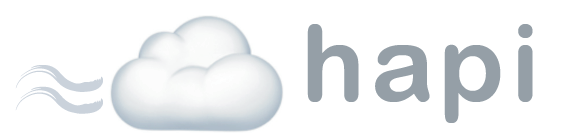

History of APIs (HAPI) is a large-scale, longitudinal database of commercial ML API predictions. It contains 1.7 million predictions collected from 2020 to 2022 and spanning APIs from Amazon, Google, IBM, and Microsoft. The database include diverse machine learning tasks including image tagging, speech recognition and text mining.

This notebook will demonstrate how to get started with the database. 

We provide a lightweight Python package for getting started with HAPI. Let's install it with pip: 

In [ ]:
!pip install "hapi@git+https://github.com/lchen001/hapi@main"

Import the library and download the data, optionally specifying the directory for the the download. 

If the directory is not specified, the data will be downloaded to `~/.hapi`.

> You can permanently set the data directory by adding the variable `HAPI_DATA_DIR` to your environment. 

In [5]:
import hapi
hapi.config.data_dir = "." 
hapi.download();

Once we've downloaded the database, we can list the available APIs, datasets, and tasks with `hapi.summary()`. This returns a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) with columns `task, dataset, api, date, path, cost_per_10k`. 

In [6]:
hapi.summary()

,task,dataset,api,date,path,cost_per_10k
0,scr,command,google_scr,20-03-29,scr/command/google_scr/20-03-29.json,60.00
1,scr,command,ibm_scr,20-03-29,scr/command/ibm_scr/20-03-29.json,25.00
2,scr,command,deepspeech_lib_scr,20-03-29,scr/command/deepspeech_lib_scr/20-03-29.json,0.02
3,scr,command,microsoft_scr,20-03-29,scr/command/microsoft_scr/20-03-29.json,41.00
4,scr,command,ibm_scr,22-05-23,scr/command/ibm_scr/22-05-23.json,25.00
...,...,...,...,...,...,...
171,fer,ferplus,facepp_fer,22-05-23,fer/ferplus/facepp_fer/22-05-23.json,5.00
172,fer,ferplus,google_fer,22-05-23,fer/ferplus/google_fer/22-05-23.json,15.00
173,sa,imdb,baidu_sa,21-02-21,sa/imdb/baidu_sa/21-02-21.json,3.50
174,sa,imdb,amazon_sa,21-02-21,sa/imdb/amazon_sa/21-02-21.json,0.75


To load the predictions into memory we use `hapi.get_predictions()`. The keyword arguments allow us to load predictions for a subset of tasks, datasets, apis and/or dates. 

The predictions are returned as a dictionary mapping from `"{task}/{dataset}/{api}/{date}"` to lists of dictionaries, each with keys `"example_id"`, `"predicted_label"`, and `"confidence"`.

In [21]:
predictions =  hapi.get_predictions(task="mic", dataset="coco", api=["google_mic", "microsoft_mic"])

predictions["mic/coco/microsoft_mic/20-11-20"][:3]

  0%|          | 0/4 [00:00<?, ?it/s]

[{'confidence': 0.8755672872,
  'example_id': 'COCO_train2014_000000448286',
  'predicted_label': ['bed', 'couch']},
 {'confidence': 0.0,
  'example_id': 'COCO_train2014_000000115250',
  'predicted_label': []},
 {'confidence': 0.6098354657,
  'example_id': 'COCO_train2014_000000545135',
  'predicted_label': ['couch', 'dining table', 'chair']}]

To load the labels into memory we use `hapi.get_labels()`. The keyword arguments allow us to load labels for a subset of tasks and datasets. 

The labels are returned as a dictionary mapping from `"{task}/{dataset}"` to lists of dictionaries, each with keys `"example_id"` and `"true_label"`. 

In [23]:
labels = hapi.get_labels(task="mic", dataset="coco")
labels["mic/coco"][:3]

  0%|          | 0/1 [00:00<?, ?it/s]

[{'example_id': 'COCO_train2014_000000448286', 'true_label': ['bed']},
 {'example_id': 'COCO_train2014_000000115250', 'true_label': []},
 {'example_id': 'COCO_train2014_000000545135',
  'true_label': ['tv',
   'couch',
   'sink',
   'potted plant',
   'book',
   'book',
   'chair',
   'book',
   'book',
   'book',
   'dining table']}]